In [ ]:

import matplotlib.pyplot as plt
from src.data_loader import load_fraud_data
from src.eda_utils import plot_class_distribution, plot_fraud_by_category, plot_fraud_by_hour
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('..')

In [3]:
print("Loading Fraud_Data.csv...")
fraud_df = load_fraud_data()
print(f"Data loaded. Shape: {fraud_df.shape}")
print("\nFirst 5 rows:")
print(fraud_df.head())

Loading Fraud_Data.csv...
Data loaded. Shape: (151112, 11)

First 5 rows:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [ ]:
print("\n Data Information ")
print(fraud_df.info())
print("\n Missing Values ")
print(fraud_df.isnull().sum())


=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB
None

=== Missing Values ===
user_id           0
signup_time       0
purchase_time     0
pur


=== Class Distribution Analysis ===


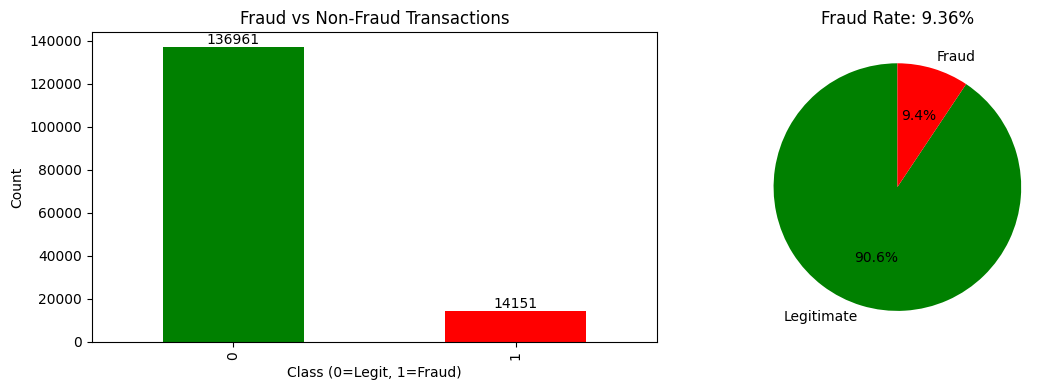

Total transactions: 151112
Legitimate (0): 136961
Fraudulent (1): 14151
Fraud percentage: 9.36%


In [ ]:
print("\n Class Distribution Analysis ")
plot_class_distribution(fraud_df)


=== Fraud by Browser ===


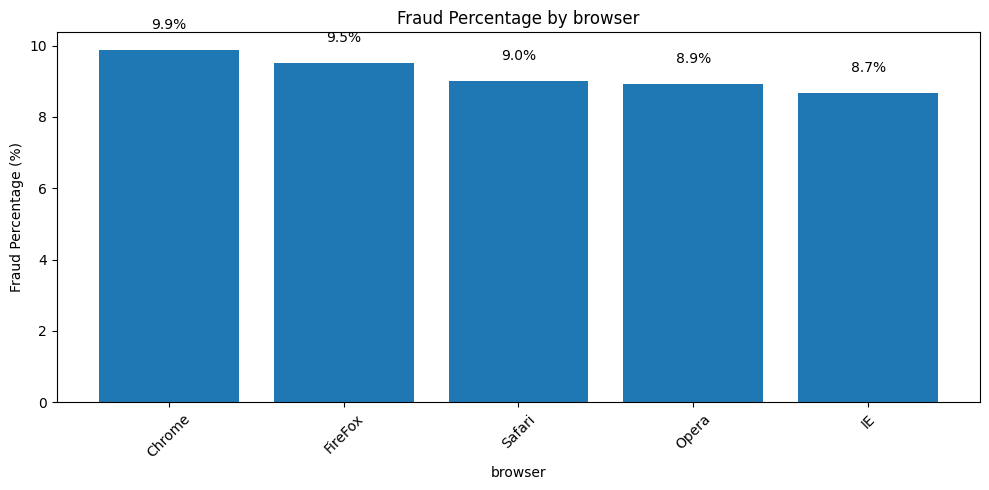

In [ ]:
print("\n Fraud by Browser ")
plot_fraud_by_category(fraud_df, 'browser')


=== Fraud by Source ===


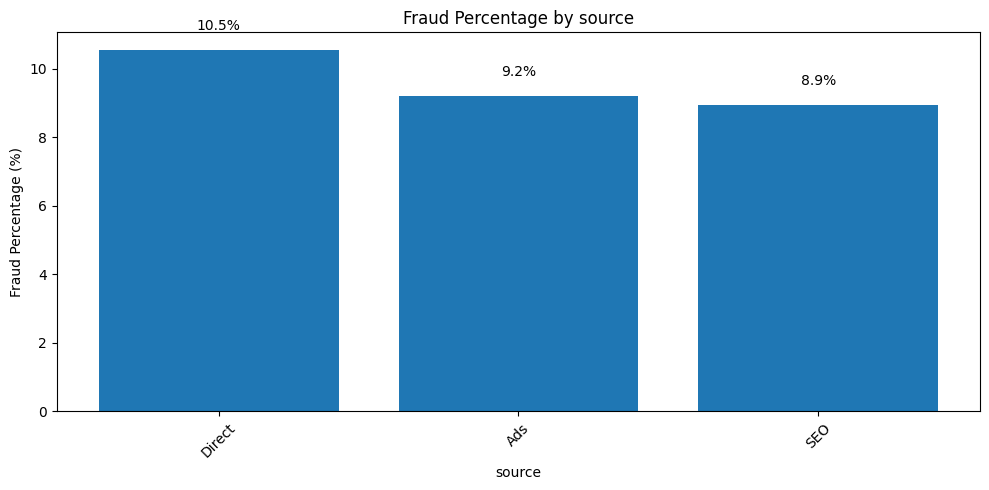

In [ ]:
print("\n Fraud by Source ")
plot_fraud_by_category(fraud_df, 'source')


=== Fraud by Gender ===


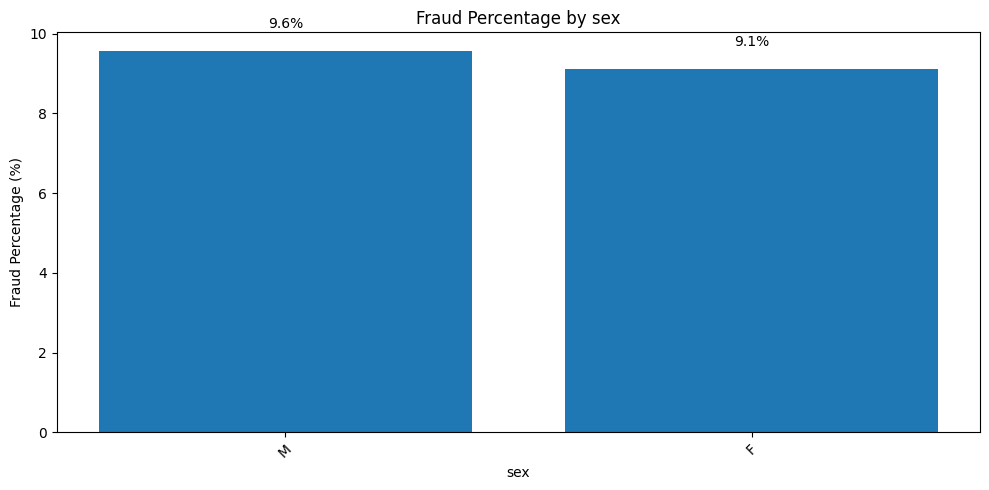

In [ ]:
print("\n Fraud by Gender ")
plot_fraud_by_category(fraud_df, 'sex')


=== Fraud by Hour of Day ===


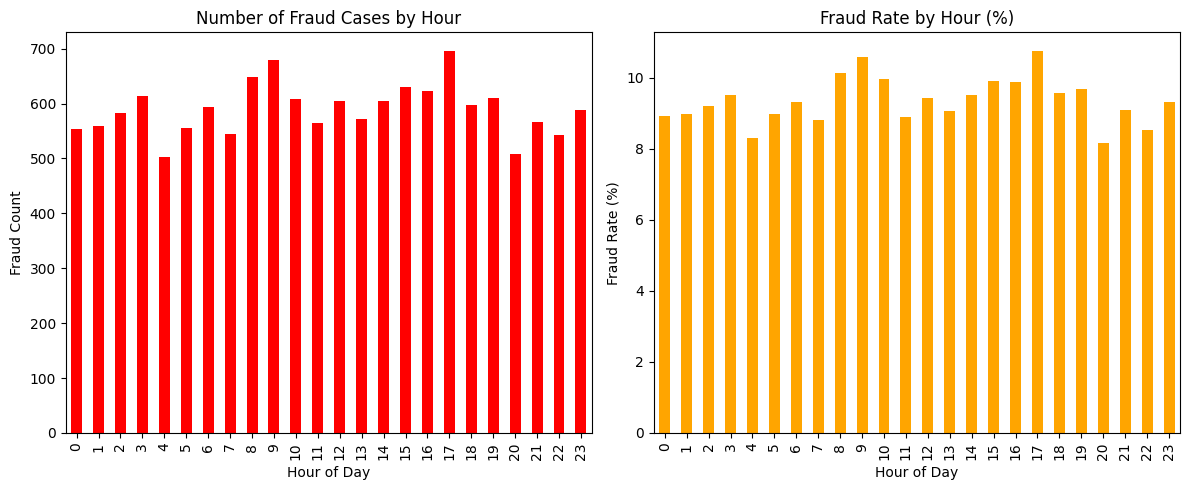

In [ ]:
print("\n Fraud by Hour of Day ")
plot_fraud_by_hour(fraud_df)


=== Age Analysis ===


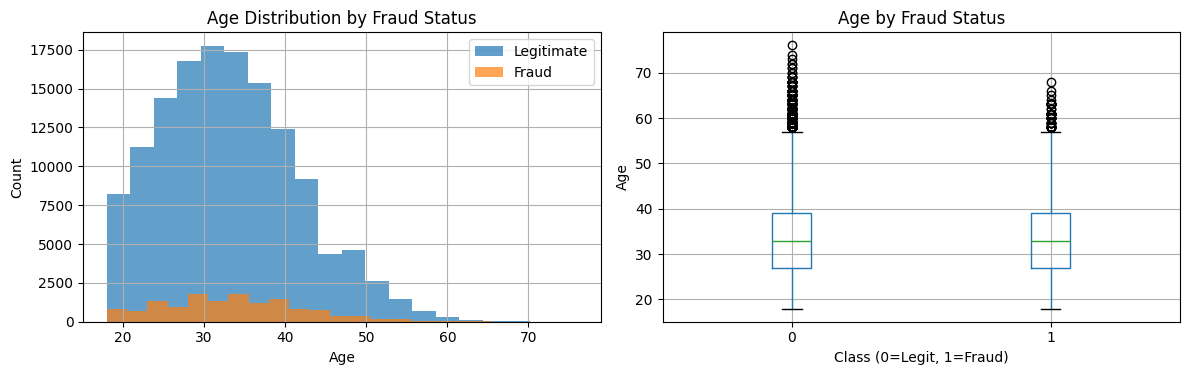

In [ ]:
print("\n Age Analysis ")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fraud_df[fraud_df['class'] == 0]['age'].hist(
    ax=ax1, alpha=0.7, label='Legitimate', bins=20)
fraud_df[fraud_df['class'] == 1]['age'].hist(
    ax=ax1, alpha=0.7, label='Fraud', bins=20)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution by Fraud Status')
ax1.legend()
fraud_df.boxplot(column='age', by='class', ax=ax2)
ax2.set_xlabel('Class (0=Legit, 1=Fraud)')
ax2.set_ylabel('Age')
ax2.set_title('Age by Fraud Status')

plt.suptitle('')
plt.tight_layout()
plt.show()


=== Purchase Value Analysis ===


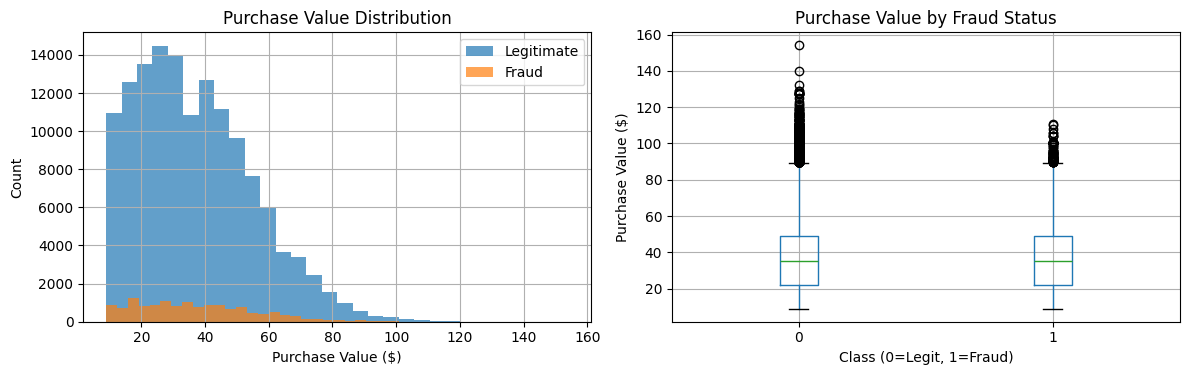


Average purchase value - Legitimate: $36.93
Average purchase value - Fraud: $36.99


In [ ]:
print("\n Purchase Value Analysis ")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

fraud_df[fraud_df['class'] == 0]['purchase_value'].hist(
    ax=ax1, alpha=0.7, label='Legitimate', bins=30)
fraud_df[fraud_df['class'] == 1]['purchase_value'].hist(
    ax=ax1, alpha=0.7, label='Fraud', bins=30)
ax1.set_xlabel('Purchase Value ($)')
ax1.set_ylabel('Count')
ax1.set_title('Purchase Value Distribution')
ax1.legend()
fraud_df.boxplot(column='purchase_value', by='class', ax=ax2)
ax2.set_xlabel('Class (0=Legit, 1=Fraud)')
ax2.set_ylabel('Purchase Value ($)')
ax2.set_title('Purchase Value by Fraud Status')

plt.suptitle('')
plt.tight_layout()
plt.show()

print(
    f"\nAverage purchase value - Legitimate: ${fraud_df[fraud_df['class'] == 0]['purchase_value'].mean():.2f}")
print(
    f"Average purchase value - Fraud: ${fraud_df[fraud_df['class'] == 1]['purchase_value'].mean():.2f}")